##### 【 KNN기반 Bream_Smelt 식별 모델 】
- 데이터 : 1000개  bream_smelt_best.csv
- 데이터셋
    * 피쳐 : Weight, Length
    * 타겟 : Species
- 학습종류
    * 지도학습 => 분류 : 2진분류
    * 알고리즘 => 최근접이웃 알고리즘 : 거리기반=>스케일링필수. 메모리 고려.

[1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
## 로딩.분석.전처리 모듈
import numpy as np
import pandas as pd

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 모델 / 전처리 모듈
from sklearn.preprocessing import StandardScaler, RobustScaler  # 전처리
from sklearn.model_selection import train_test_split            # 데이터셋 분리
from sklearn.neighbors import KNeighborsClassifier              # 알고리즘

In [2]:
## 데이터 로딩
DATA_FILE = '../Data/bream_smelt_best.csv'

## CSV => DataFrame 로딩
fishDF = pd.read_csv(DATA_FILE)


[2] 데이터 확인 및 전처리<hr>

In [3]:
## [2-1] 데이터 확인 :  info()/describe()/....
display( fishDF.head(3) )
fishDF.info()

,Species,Weight,Length
0,Bream,571.601047,31.859840
1,Bream,738.705906,34.736276
2,Bream,744.045620,35.033417


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  1000 non-null   object 
 1   Weight   1000 non-null   float64
 2   Length   1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [ ]:
## 컬럼별 기술통계 확인
## => Weight, Length 모두 음의 왜도. 왼쪽꼬리, 오른쪽 쏠림
fishDF.describe()

,Weight,Length
count,1000.000000,1000.000000
mean,438.688639,26.721465
std,331.322117,10.329141
min,0.001000,7.279967
25%,14.979128,13.388342
50%,508.053365,30.842615
75%,691.673608,34.444984
max,1264.316977,43.363260


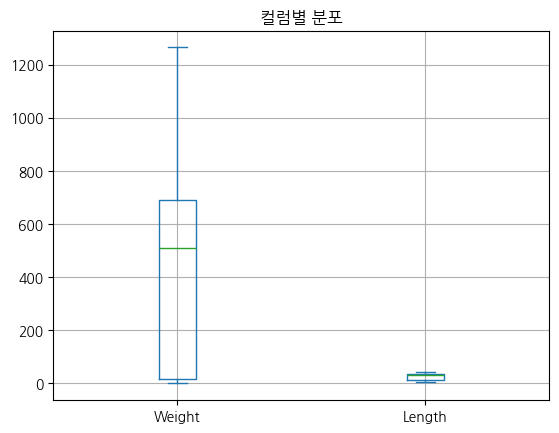

In [ ]:
## -----------------------------------------
## 결측치/중복값/이상치
## -----------------------------------------
fishDF.isna().sum()         ## => 0개

fishDF.duplicated().sum()   ## => 0개

fishDF.plot(kind='box', title='컬럼별 분포', grid=True)
plt.show()